# Exercise: Classify Fashion Items with Support Vector Machines

In this exercise, we'll classify fashion items with support vector machines in scikit-learn. You'll see that image classification is very similar to classification of other data formats, you can directly apply your scikit-learn knowledge from previous lessons! Your tasks are the following:

- Train a support vector machine to classify images of fashion items
- Make predictions and evaluate the model
- Plot the results including a confusion matrix
- Optimize your model using grid search and cross validation
- Evaluate the best model

Acknowledgements: This exercise is loosely based on https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py and https://github.com/zalandoresearch/fashion-mnist

In [1]:
# imports
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Acquisition and Preprocessing

In [2]:
# load the MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
# load the training and test data
X_train, y_train = load_mnist('../../images/fashion', kind='train')
X_test, y_test = load_mnist('../../images/fashion', kind='t10k')

In [4]:
# shuffle data
idx = np.arange(len(X_train))
np.random.shuffle(idx)

# we'll only use 10% of the data for speed-up
X_train = X_train[:int(.10*len(idx))]
y_train = y_train[:int(.10*len(idx))]

In [5]:
# store the labels
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

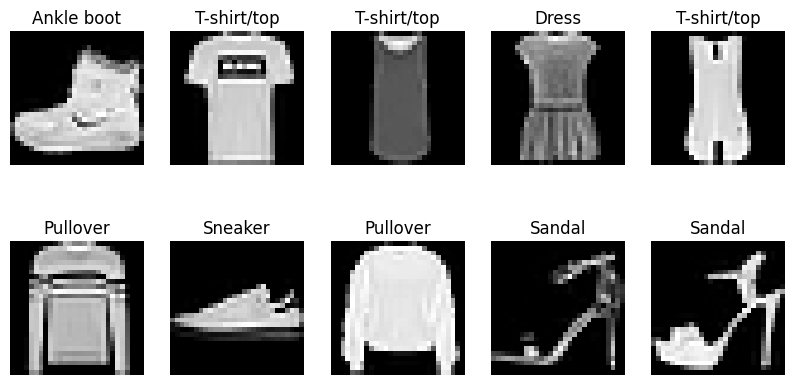

In [6]:
# plot the first 10 images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i//5, i%5].imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title(classes[y_train[i]])

## 2. Train a Support Vector Machine for Image Classification

**TODO**: Import a linear support vector classifier (SVC) from scikit-learn and fit it on the training data!

In [7]:
# Fit a support vector machine to the data
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**TODO:** Evaluate the model on the test data and print the accuracy.

In [8]:
# Predict the labels of the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy)

Accuracy: 0.80


**TODO**: Plot some sample images including their labels and predictions for comparison!

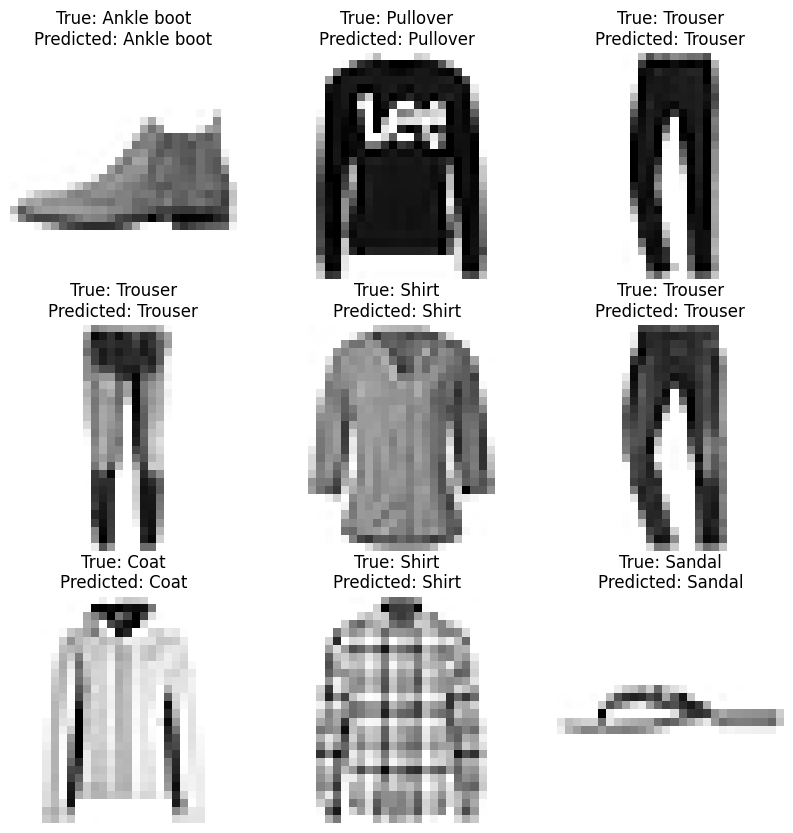

In [9]:
# plot some images and their predicted and true labels
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='binary')
    ax.set_title('True: %s\nPredicted: %s' % (classes[y_test[i]], classes[y_pred[i]]))
    ax.axis('off')

**TODO**: Plot the confusion matrix for your predictions!

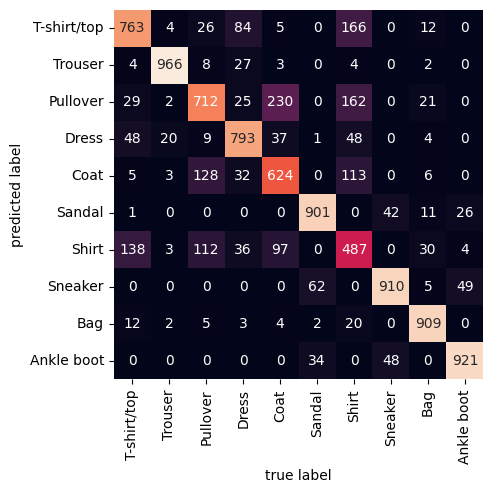

In [10]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## 3. Model Fine-Tuning

**TODO**: Optimize your model using grid search and cross validation!

In [11]:
# Optimizing the hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize over 2x2x4=16 combinations of hyperparameters
param_grid = { 'C': [1, 10], # Regularization parameter
            'gamma': [0.0001, 0.001], # Kernel coefficient
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'] } # Kernel type

# Use cross-validation with 5 folds, that's a total of 5x16=80 fits
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.813 total time=   2.0s
[CV 2/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.808 total time=   1.9s
[CV 3/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.786 total time=   1.8s
[CV 4/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.817 total time=   2.3s
[CV 5/5] END ..C=1, gamma=0.0001, kernel=linear;, score=0.789 total time=   2.1s
[CV 1/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.107 total time=  10.6s
[CV 2/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.107 total time=  10.2s
[CV 3/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.107 total time=  13.6s
[CV 4/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.107 total time=  36.2s
[CV 5/5] END .....C=1, gamma=0.0001, kernel=rbf;, score=0.107 total time=  17.7s
[CV 1/5] END ....C=1, gamma=0.0001, kernel=poly;, score=0.824 total time=   1.3s
[CV 2/5] END ....C=1, gamma=0.0001, kernel=poly;

c:\Users\muntzinger\Documents\Arbeit_HFT\9_Sonstiges\Udacity\Udacity_Instructor_DSND\Exercises\.venv\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1, 10], 'gamma': [0.0001, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=3)

**TODO**: Evaluate your best model: Print the optimal parameters and calculate the accuracy!

In [12]:
# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}


In [13]:
best_model = grid_search.best_estimator_
final_model = best_model.fit(X_train, y_train) # Fit the best model on the full training set
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy)

Accuracy: 0.81
